In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.semi_supervised import LabelSpreading

In [2]:
X, y = make_moons(n_samples=150, noise=0.2, random_state=42)

In [3]:
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(len(y)) < 0.60  # 60% of data is unlabeled

labels = np.copy(y)
labels[random_unlabeled_points] = -1  # -1 is the marker for unlabeled data in scikit-learn

In [4]:
label_spread = LabelSpreading(kernel='knn', alpha=0.7)

label_spread.fit(X, labels)

LabelSpreading(alpha=0.7, kernel='knn')

In [20]:
label_spread = LabelSpreading(kernel='rbf', alpha=0.7)

label_spread.fit(X, labels)

LabelSpreading(alpha=0.7)

In [21]:
output_labels = label_spread.transduction_

Text(0.5, 1.0, 'Original Data (Labelled and Unlabeled)')

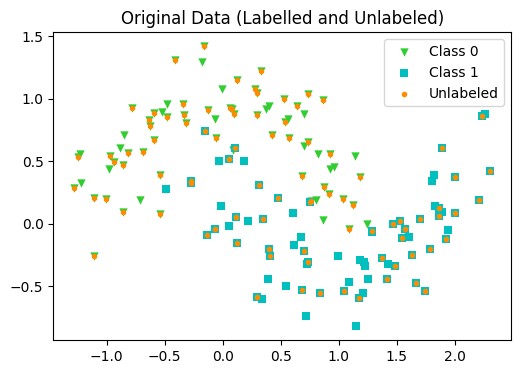

In [22]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='limegreen', marker='v', lw=0, label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='c', marker='s', lw=0, label="Class 1")

plt.scatter(X[random_unlabeled_points, 0], X[random_unlabeled_points, 1], color='darkorange', marker='.', label="Unlabeled")

plt.legend(loc='upper right')
plt.title("Original Data (Labelled and Unlabeled)")

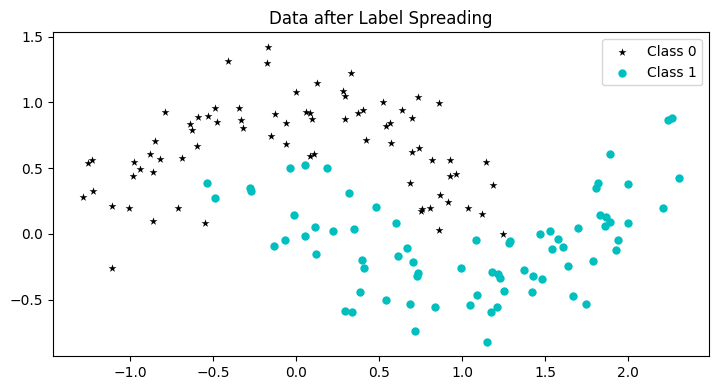

In [23]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 2)

plt.scatter(X[output_labels == 0, 0], X[output_labels == 0, 1], color='black', marker='*', lw=0, label="Class 0")
plt.scatter(X[output_labels == 1, 0], X[output_labels == 1, 1], color='c', marker='o', lw=0, label="Class 1")

plt.legend(loc='upper right')
plt.title("Data after Label Spreading")

plt.tight_layout()
plt.show()